# Prueba de Gmmhmm y fuzzy clustering basada en datos sin transformation, pca y  factor   

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
os.getcwd()

'/Users/nesdav/Documents/supervicion/supervi/GMMHMM'

In [134]:
d = pd.read_csv("data.csv")
d.head()

,Unnamed: 0,Lugar,Grabadora,Transformación,Permanencia,Longitud,ACIft,ADI,ACItf,BI,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,20160101,Guajira,5067,Alta,Baja,73º26'3.2''W,-0.171947,0.584782,-0.475717,-0.860168,...,0.206630,0.260610,-0.326033,0.486937,0.232333,0.149117,-0.372678,-1.039871,-0.914863,-0.200129
1,20160102,Guajira,5067,Alta,Baja,73º26'3.2''W,-0.304241,0.874729,-0.565690,-0.375552,...,0.350874,0.122914,-0.517690,0.421486,0.152173,0.262447,0.029164,-0.745587,-0.942384,-0.068598
2,20160103,Guajira,5067,Alta,Baja,73º26'3.2''W,-0.339822,0.746814,-0.458379,-0.135205,...,0.290717,0.507416,-0.391097,0.740404,0.132742,0.167833,0.237685,-0.404005,-0.543876,0.101897
3,20160104,Guajira,5067,Alta,Baja,73º26'3.2''W,-0.229584,0.918072,-0.325400,-0.110043,...,0.350568,0.274446,-0.362861,0.131288,-0.111861,0.054663,-0.090833,-0.648560,-0.544687,0.117638
4,20160105,Guajira,5067,Alta,Baja,73º26'3.2''W,-0.308185,0.817189,-0.322157,-0.138337,...,0.240093,0.233373,-0.323291,0.180075,-0.131029,-0.073313,-0.177323,-0.836910,-0.718013,0.046863


In [168]:
prueba = pd.read_csv("prueba.csv")
prueba.head()
ypruebaP=prueba["Permanencia"]  ## this is the label 
ypruebaT=prueba["Transformación"]
trans={'Alta':2,'Baja':0,'Media':1}
ypruebaP=[trans[item] for item in ypruebaP]
ypruebaT=[trans[item] for item in ypruebaT]
pruebaw=prueba.iloc[:,6:] #x without transformation
listnames=list(pruebaw.columns)  ##Columns names
pruebaw.head()
ypruebaT
pruebaw

,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,-0.435058,1.275662,-0.439924,-0.139908,0.514434,-0.093809,0.096158,-0.626356,-1.244935,-0.800842,...,-0.053867,0.242840,-0.165097,0.425082,-0.008938,0.026470,-0.487961,-0.683307,-0.124688,0.402643
1,-0.570661,0.880668,-0.569411,-0.594631,0.593560,0.402622,-0.233380,-0.644169,-1.246419,-0.947785,...,0.136905,0.447859,-0.129551,0.675796,0.183420,0.425320,0.378965,0.013275,0.173991,0.371287
2,-0.424223,0.680544,-0.511203,0.539312,0.899685,0.816423,-1.552118,-0.882716,0.163955,-0.235775,...,0.380790,-0.486796,-1.242405,-0.208256,-0.144153,-0.337483,-0.660418,0.255158,0.392132,0.780550
3,-0.219152,1.117312,-0.290833,0.783075,0.892831,0.832055,-0.580330,-0.673303,0.158593,-0.419516,...,0.623562,0.095884,-0.885755,-1.118733,-0.821934,-0.901228,-0.631654,0.255819,0.713468,0.683599
4,-0.592418,0.485133,-0.707191,0.698474,0.906281,0.593581,-0.381851,-0.845105,0.165625,-0.705742,...,0.735563,0.185636,-0.467183,0.048921,0.189237,0.647557,0.240462,0.771373,0.740853,0.658127
5,-0.768014,0.124140,-0.734598,0.147784,0.907910,0.695378,-0.967323,-0.878308,0.164649,-0.787781,...,0.867826,0.712831,-0.211872,0.361293,0.404902,0.814606,0.639291,1.064020,0.941284,0.521843
6,-0.344035,0.124954,-0.744977,-0.410613,0.021814,0.885509,-1.322337,-0.399629,-1.154367,-0.953093,...,-0.246131,-0.668506,-0.416321,-0.844217,-1.376920,-0.679590,0.202064,0.240592,0.205345,0.504519
7,-0.208306,-0.420762,-0.807050,0.172283,-0.359949,0.515397,-0.865578,-0.256189,-1.095251,-0.744578,...,-0.982501,-1.260339,-0.887874,-0.727706,-1.167041,-1.603140,-0.593659,-0.301249,-0.300255,-0.128925
8,-0.830709,1.158181,-0.514974,0.521132,0.775446,0.495256,1.063159,0.450632,0.150555,-0.814592,...,-0.000775,-0.556258,-1.004958,-0.096940,0.859459,1.045912,-0.192370,0.610458,0.842628,0.688797
9,-0.894780,1.381166,-0.435920,0.843146,0.798996,0.351358,1.102550,0.329489,0.143978,-0.962909,...,-0.146209,-1.899922,-2.998011,-1.301181,0.503453,0.620582,0.013659,0.349704,0.584751,0.320145


In [154]:
d.describe()

,Unnamed: 0,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
count,4.800000e+01,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2.015974e+07,-0.388149,0.705935,-0.382888,0.297768,0.588092,0.518360,-0.238546,-0.175725,-0.391602,...,0.272222,-0.170470,-0.530227,-0.031110,-0.026964,-0.105272,-0.086363,0.184053,0.328159,0.379578
std,6.104042e+03,0.417588,0.512098,0.381946,0.543745,0.379267,0.591759,0.723389,1.183857,0.662391,...,0.652869,0.754506,0.499294,0.468836,0.472345,0.638377,0.593284,0.761811,0.852762,0.726520
min,2.015121e+07,-1.292961,-0.499247,-0.804848,-0.860168,-0.590470,-1.110190,-1.233281,-0.902169,-1.249019,...,-3.005511,-3.574186,-2.210150,-1.787838,-1.685194,-1.990108,-2.205776,-2.595717,-3.016703,-3.061579
25%,2.015788e+07,-0.635036,0.522479,-0.648515,-0.111244,0.435768,0.101551,-0.823806,-0.787586,-1.153784,...,0.071781,-0.456821,-0.756196,-0.239197,-0.231715,-0.520063,-0.382280,-0.311140,-0.177813,0.124875
50%,2.016011e+07,-0.344028,0.683260,-0.528473,0.293334,0.773082,0.686528,-0.461281,-0.578829,0.144902,...,0.341794,-0.093681,-0.483029,0.062746,0.032930,0.001001,0.052389,0.388797,0.680284,0.551354
75%,2.016122e+07,-0.195007,1.128980,-0.157816,0.457668,0.895362,0.932064,0.203549,0.131070,0.159570,...,0.722134,0.278338,-0.206076,0.290927,0.196751,0.266408,0.262801,0.623187,0.887522,0.871470
max,2.017011e+07,0.420727,1.724052,1.022881,1.749338,0.908549,1.317390,1.202985,6.812309,0.194823,...,0.974399,0.743859,0.293253,0.740404,0.942343,0.957945,1.003752,1.106136,1.175312,1.146806


In [4]:
yp=d["Permanencia"]  ## this is the label 
yt=d["Transformación"]

trans={'Alta':2,'Baja':0,'Media':1}
yt=[trans[item] for item in yt]

In [137]:
xw=d.iloc[:,6:] #x without transformation
listnames=list(xw.columns)  ##Columns names


In [6]:
x= StandardScaler().fit_transform(xw.values)  ##give numpy array values
scalx=pd.DataFrame(x,index=xw.index,columns=xw.columns) #so we need to transform it 
scalx.head()

,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,0.523219,-0.239086,-0.245615,-2.152095,-0.811262,-1.197414,-0.815941,-0.620119,-1.270065,-0.373432,...,-0.101531,0.577387,0.413293,1.116656,0.554766,0.402710,-0.487699,-1.623598,-1.473068,-0.806367
1,0.203063,0.333100,-0.483674,-1.251407,-0.377305,-1.540880,0.348223,-0.497861,-1.308126,0.395350,...,0.121745,0.392958,0.025376,0.975575,0.383263,0.582117,0.196787,-1.233215,-1.505682,-0.623409
2,0.116954,0.080670,-0.199741,-0.804707,-0.398314,-0.868588,0.448786,-0.452648,-1.296725,-0.130841,...,0.028629,0.907958,0.281602,1.663007,0.341690,0.432339,0.551974,-0.780088,-1.033422,-0.386251
3,0.383735,0.418634,0.152106,-0.757943,-0.317457,-1.021832,0.633898,-0.329021,-1.298846,0.341593,...,0.121272,0.595919,0.338753,0.350050,-0.181637,0.253185,-0.007614,-1.104504,-1.034384,-0.364356
4,0.193518,0.219550,0.160686,-0.810528,-0.329051,-1.588328,0.612182,-0.363019,-1.286741,0.814384,...,-0.049734,0.540905,0.418843,0.455211,-0.222647,0.050593,-0.154937,-1.354359,-1.239787,-0.462803


 # PCA

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(scalx)

principalDf = pd.DataFrame(data = principalComponents)
principalDf.shape


(48, 4)

In [8]:

finalDf = pd.concat([principalDf, d[['Permanencia']]], axis = 1)
finalDf.shape

(48, 5)

In [9]:
import pandas as pd
from sklearn import decomposition, preprocessing

df=xw

pca_data = preprocessing.scale(df)

pca = decomposition.PCA(n_components = 4)
pca.fit(pca_data)
transformed_pca = pca.transform(pca_data)

cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])

print(cum_explained_var)  ##var acumulative

[0.4027207935982306, 0.5873990354792143, 0.7074898782226648, 0.7998966291832149]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [10]:
principalDf = pd.DataFrame(data = transformed_pca)
finalDf = pd.concat([principalDf, d[['Permanencia']]], axis = 1) ###
pca.explained_variance_ratio_
#finalDf
#principalDf

array([0.40272079, 0.18467824, 0.12009084, 0.09240675])

# pruebas de normalidad

In [11]:
from scipy import stats
kolmogorov=[]
for i in range(0,29):
 kolmogorov.append(stats.kstest(scalx.iloc[:,i], 'norm').pvalue)

In [12]:
type(kolmogorov)
#kolmogorov

list

In [13]:
shapi=[]
for i in range(0,29):
 shapi.append(stats.shapiro(df.iloc[:,i]))
#shapi

/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1650: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


# Analisis factorial

In [14]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=4, random_state=0)
X_transformed = transformer.fit_transform(xw)
X_transformed;


In [15]:
principalf = pd.DataFrame(data = X_transformed)
finalf = pd.concat([principalf, d[['Permanencia']]], axis = 1)
finalf=finalDf.rename(columns={'Permanencia':'target'});


In [16]:
trans={'Alta':2,'Baja':0,'Media':1}
finalf.target=[trans[item] for item in finalf.target]

In [17]:
finalf.target;


# Graficas de los datos

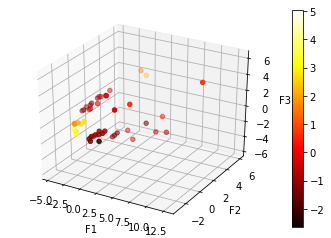

In [18]:
##Grafica de los datos con Factor

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

features=finalDf
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[0]
y = features[1]
z = features[2]
c = features[3]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3')
plt.show()

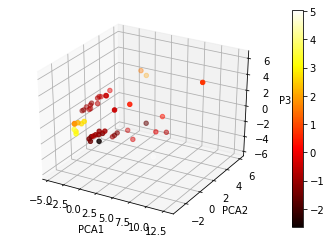

In [19]:
features= principalDf
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[0]
y = features[1]
z = features[2]
c = features[3]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('P3')
plt.show()

# K-means

In [170]:
from sklearn.cluster import KMeans  ##training with standarized data
from sklearn.metrics import accuracy_score



#features=finalf
#plt.scatter(features[0], features[1], alpha=0.8,
#             c=y_kmeans,  cmap='viridis')   
#plt.title("Entrenados con raw data")

kmeans = KMeans(n_clusters=3)

accuracyxw=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(xw)
    y_kmeans = kmeans.predict(xw)
    accuracyxw[i]= accuracy_score(y_kmeans,finalf.target)
    accuracyyt[i]= accuracy_score(y_kmeans,yt)
    
accuracyxw  


array([0.        , 0.25      , 0.5       , 0.25      , 0.1875    ,
       0.45833333, 0.45833333, 0.5       , 0.29166667, 0.47916667,
       0.25      , 0.25      , 0.39583333, 0.41666667, 0.29166667,
       0.22916667, 0.22916667, 0.1875    , 0.29166667, 0.25      ])

In [171]:
accuracyyt

array([0.        , 0.20833333, 0.5       , 0.20833333, 0.4375    ,
       0.6875    , 0.08333333, 0.5       , 0.5       , 0.10416667,
       0.20833333, 0.29166667, 0.60416667, 0.58333333, 0.5       ,
       0.39583333, 0.39583333, 0.4375    , 0.5       , 0.20833333])

In [173]:
from sklearn.cluster import KMeans  ##training with PCA data
from sklearn.metrics import accuracy_score


kmeans = KMeans(n_clusters=3)

accuracypca=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(principalDf)
    y_kmeans = kmeans.predict(principalDf)
    accuracypca[i]= accuracy_score(y_kmeans,finalf.target)
    accuracyyt[i]= accuracy_score(y_kmeans,yt)


accuracypca    
#print ("accuracy:",accuracy_score(y_kmeans,finalf.target))
#features=finalDf
#plt.scatter(features[0], features[1], alpha=0.8,
#             c=y_kmeans,  cmap='viridis')   

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.4);
#plt.title("entrenados con PCA")



array([0.        , 0.4375    , 0.29166667, 0.10416667, 0.27083333,
       0.375     , 0.4375    , 0.25      , 0.52083333, 0.29166667,
       0.3125    , 0.29166667, 0.4375    , 0.52083333, 0.5       ,
       0.10416667, 0.27083333, 0.375     , 0.45833333, 0.45833333])

In [174]:
accuracyyt

array([0.        , 0.52083333, 0.22916667, 0.33333333, 0.25      ,
       0.02083333, 0.52083333, 0.22916667, 0.64583333, 0.20833333,
       0.25      , 0.22916667, 0.52083333, 0.64583333, 0.45833333,
       0.33333333, 0.22916667, 0.04166667, 0.04166667, 0.04166667])

In [195]:
from sklearn.cluster import KMeans  ##training with Factor data

kmeans = KMeans(n_clusters=3)

accuracyF=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(principalf)
    y_kmeans = kmeans.predict(principalf)
    accuracyF[i]= accuracy_score(y_kmeans,finalf.target)
    accuracyyt[i]= accuracy_score(y_kmeans,yt)
accuracyF   

array([0.        , 0.10416667, 0.29166667, 0.22916667, 0.29166667,
       0.39583333, 0.375     , 0.52083333, 0.47916667, 0.16666667,
       0.47916667, 0.47916667, 0.47916667, 0.375     , 0.10416667,
       0.47916667, 0.5625    , 0.25      , 0.47916667, 0.10416667])

In [196]:
accuracyyt

array([0.        , 0.3125    , 0.70833333, 0.0625    , 0.70833333,
       0.        , 0.        , 0.6875    , 0.52083333, 0.25      ,
       0.52083333, 0.22916667, 0.52083333, 0.        , 0.3125    ,
       0.52083333, 0.35416667, 0.25      , 0.52083333, 0.3125    ])

In [223]:

from sklearn.cluster import SpectralClustering

accuracyS=np.zeros(20)
accuracyyt=np.zeros(20)


for i in range(1, 20):
    model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                           assign_labels='kmeans')
    labels = model.fit_predict(scalx)
    accuracyS[i]= accuracy_score(labels,finalf.target)
    accuracyyt[i]= accuracy_score(labels,yt)


accuracyS
   

array([0.        , 0.0625    , 0.4375    , 0.45833333, 0.45833333,
       0.0625    , 0.45833333, 0.4375    , 0.45833333, 0.45833333,
       0.0625    , 0.45833333, 0.4375    , 0.4375    , 0.45833333,
       0.5       , 0.45833333, 0.4375    , 0.45833333, 0.4375    ])

In [224]:
    accuracyyt



array([0.        , 0.27083333, 0.0625    , 0.5       , 0.5       ,
       0.27083333, 0.5       , 0.0625    , 0.5       , 0.5       ,
       0.27083333, 0.5       , 0.0625    , 0.0625    , 0.5       ,
       0.66666667, 0.5       , 0.0625    , 0.5       , 0.0625    ])

Prueba


In [230]:

model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels=model.fit_predict(pruebaw)
accuracy_score(labels,ypruebaT)

0.6

# GMM 

In [234]:


from sklearn.mixture import GaussianMixture as GMM

accuracyGMM=np.zeros(20)
accuracyGMMyt=np.zeros(20)
for i in range(1, 20):
    gmm = GMM(n_components=3).fit(principalf)
    labels = gmm.predict(principalf)
    accuracyGMM[i]=accuracy_score(labels,finalf.target)
    accuracyGMMyt[i]=accuracy_score(labels,yt)


accuracyGMM


array([0.        , 0.5       , 0.0625    , 0.22916667, 0.04166667,
       0.20833333, 0.27083333, 0.4375    , 0.5       , 0.5625    ,
       0.35416667, 0.16666667, 0.375     , 0.        , 0.47916667,
       0.47916667, 0.52083333, 0.1875    , 0.375     , 0.35416667])

In [235]:
accuracyGMMyt



array([0.        , 0.375     , 0.22916667, 0.27083333, 0.375     ,
       0.4375    , 0.22916667, 0.77083333, 0.375     , 0.375     ,
       0.77083333, 0.0625    , 0.        , 0.3125    , 0.52083333,
       0.52083333, 0.5625    , 0.3125    , 0.        , 0.77083333])

# GMMHMMM 

Se hace la prueba con los datos de transformation y permanencia, entrenando con los datos optenidos por pca

In [239]:

##con permanencia 
from hmmlearn import hmm
Amgmm=np.zeros((5,10))
Amgmmyt=np.zeros((5,10))
for i in range(1, 4): 
    for j in range(1, 10):
        modelhm=hmm.GMMHMM(n_components=4,n_mix=i) 
        modelhm.fit(principalf)
        labels = modelhm.predict(principalf)
        #        gmm = GMM(n_components=j).fit(principalf)
        #       labels = gmm.predict(principalf)
        Amgmm[i,j]=accuracy_score(labels,finalf.target) 
        Amgmmyt[i,j]=accuracy_score(labels,yt) 


Amgmm

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.41666667, 0.27083333, 0.45833333, 0.45833333,
        0.0625    , 0.0625    , 0.16666667, 0.5       , 0.45833333],
       [0.        , 0.29166667, 0.29166667, 0.16666667, 0.        ,
        0.45833333, 0.45833333, 0.41666667, 0.41666667, 0.16666667],
       [0.        , 0.27083333, 0.45833333, 0.27083333, 0.0625    ,
        0.5       , 0.        , 0.125     , 0.45833333, 0.125     ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

Maximo accuracy se optiene en varios casos de 0.5

In [238]:
Amgmmyt



array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.27083333, 0.22916667, 0.66666667, 0.        ,
        0.29166667, 0.        , 0.22916667, 0.22916667, 0.20833333],
       [0.        , 0.20833333, 0.27083333, 0.        , 0.0625    ,
        0.29166667, 0.        , 0.27083333, 0.27083333, 0.0625    ],
       [0.        , 0.22916667, 0.        , 0.29166667, 0.5       ,
        0.29166667, 0.29166667, 0.        , 0.20833333, 0.70833333],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [241]:
#con transformaci, entrenando con factor analisis 

Amgmm=np.zeros((5,10))
Amgmmyt=np.zeros((5,10))

for i in range(1, 4): 
    for j in range(1, 10):
        modelhm=hmm.GMMHMM(n_components=4,n_mix=i) 
        modelhm.fit(principalf)
        labels = modelhm.predict(principalf)
        #        gmm = GMM(n_components=j).fit(principalf)
        #       labels = gmm.predict(principalf)
        Amgmm[i,j]=accuracy_score(labels,finalf.target) 
        Amgmmyt[i,j]=accuracy_score(labels,yt) 
Amgmm

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.45833333, 0.45833333, 0.        , 0.5       ,
        0.0625    , 0.125     , 0.375     , 0.45833333, 0.375     ],
       [0.        , 0.0625    , 0.29166667, 0.41666667, 0.29166667,
        0.375     , 0.29166667, 0.45833333, 0.5       , 0.        ],
       [0.        , 0.29166667, 0.        , 0.41666667, 0.29166667,
        0.375     , 0.27083333, 0.375     , 0.125     , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [242]:
Amgmmyt

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.29166667, 0.20833333, 0.29166667,
        0.22916667, 0.125     , 0.        , 0.29166667, 0.        ],
       [0.        , 0.22916667, 0.66666667, 0.        , 0.70833333,
        0.        , 0.66666667, 0.29166667, 0.29166667, 0.20833333],
       [0.        , 0.66666667, 0.20833333, 0.        , 0.70833333,
        0.        , 0.27083333, 0.        , 0.33333333, 0.20833333],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

en el numero de estados en GMM n_mix=2, con el numero de componentes n_components=6 se 
tiene accuracy de 0.72
nmix=3,ncomponents=2, se tiene un accuracy de 0.77



In [243]:
#Entrenando con PCA

Amgmm=np.zeros((5,10))
for i in range(1, 4): 
    for j in range(1, 10):
        modelhm=hmm.GMMHMM(n_components=3,n_mix=i) 
        modelhm.fit(principalDf)
        labels = modelhm.predict(principalDf)
        #        gmm = GMM(n_components=j).fit(principalf)
        #       labels = gmm.predict(principalf)
        Amgmm[i,j]=accuracy_score(labels,finalf.target)
        Amgmmyt[i,j]=accuracy_score(labels,yt) 


Amgmm

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.54166667, 0.45833333, 0.08333333, 0.54166667,
        0.22916667, 0.45833333, 0.54166667, 0.22916667, 0.22916667],
       [0.        , 0.39583333, 0.41666667, 0.41666667, 0.5       ,
        0.41666667, 0.27083333, 0.45833333, 0.27083333, 0.5       ],
       [0.        , 0.54166667, 0.3125    , 0.5       , 0.41666667,
        0.45833333, 0.3125    , 0.08333333, 0.41666667, 0.45833333],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [244]:
Amgmmyt

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.04166667, 0.25      , 0.5       ,
        0.22916667, 0.04166667, 0.5       , 0.22916667, 0.22916667],
       [0.        , 0.04166667, 0.        , 0.        , 0.45833333,
        0.        , 0.27083333, 0.04166667, 0.27083333, 0.45833333],
       [0.        , 0.625     , 0.22916667, 0.45833333, 0.54166667,
        0.70833333, 0.22916667, 0.25      , 0.54166667, 0.04166667],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

 # Fuzzy cmeans

In [246]:


from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data=scalx.transpose(),c=3, m= 2, error=0.005, maxiter=1000, init=None)

In [247]:
df2 = pd.DataFrame(u.transpose(), columns=['C1', 'C2', 'C3'])
df2['permanence']=finalf.target
df2['Transformation']=yt
df2;

In [248]:
cntr, U, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data=principalDf.transpose(),c=3, m= 2, error=0.005, maxiter=1000, init=None)

In [252]:
U[:,47]
U[1]

array([0.10443644, 0.04544864, 0.06320466, 0.02094563, 0.03329755,
       0.03474539, 0.01055274, 0.0172641 , 0.0486315 , 0.01756131,
       0.92869765, 0.47359   , 0.49442898, 0.16491923, 0.16892197,
       0.21776487, 0.98526501, 0.8874263 , 0.96756631, 0.89979798,
       0.96523667, 0.88574731, 0.96560501, 0.96807324, 0.95521592,
       0.91629812, 0.92913962, 0.86902276, 0.85452207, 0.8999678 ,
       0.24823217, 0.19477428, 0.12838328, 0.05338836, 0.01960188,
       0.03206858, 0.19148125, 0.19856099, 0.22671708, 0.05822364,
       0.40765135, 0.41793821, 0.36070914, 0.3597577 , 0.34911809,
       0.33755733, 0.35767221, 0.29615427])

In [250]:
udes=np.argmax(U,axis=0)
accuracy_score(udes,finalf.target)



0.25

In [253]:
df2 = pd.DataFrame(U.transpose(), columns=['C1', 'C2', 'C3'])
df2['permanence']=finalf.target
df2['Transformation']=yt
df2

,C1,C2,C3,permanence,Transformation
0,0.142314,0.104436,0.753250,0,2
1,0.043724,0.045449,0.910827,0,2
2,0.054625,0.063205,0.882170,0,2
3,0.023615,0.020946,0.955439,0,2
4,0.045595,0.033298,0.921107,0,2
5,0.052528,0.034745,0.912727,0,2
6,0.009757,0.010553,0.979690,0,2
7,0.018892,0.017264,0.963844,0,2
8,0.039889,0.048632,0.911479,0,2
9,0.018506,0.017561,0.963933,0,2


gk means: https://pure.tue.nl/ws/portalfiles/portal/3635433/Metis256338.pdf
https://github.com/ITE-5th/fuzzy-clustering/blob/master/algorithms/gk.py
http://w3.ualg.pt/~jvo/ml2015-16/ml2015-16L17.pdf

In [105]:
udes=np.argmax(U,axis=0)
udes


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2])

In [106]:
accuracy_score(udes,finalf.target)


0.25

# GKMEANS

In [275]:
import numpy as np
from scipy.linalg import norm


class GK:
    def __init__(self, n_clusters=4, max_iter=100, m=2, error=1e-6):
        super().__init__()
        self.u, self.centers, self.f = None, None, None
        self.clusters_count = n_clusters
        self.max_iter = max_iter
        self.m = m
        self.error = error

    def fit(self, z):
        N = z.shape[0]
        C = self.clusters_count
        centers = []

        u = np.random.dirichlet(np.ones(N), size=C)

        iteration = 0
        while iteration < self.max_iter:
            u2 = u.copy()

            centers = self.next_centers(z, u)
            f,numerator,v = self._covariance(z, centers, u)
            dist = self._distance(z, centers, f)
            u = self.next_u(dist)
            iteration += 1

            # Stopping rule
            if norm(u - u2) < self.error:
                break

        self.f = f
        self.u = u
        self.centers = centers
        return centers, f, u ,numerator,v

    def next_centers(self, z, u):
        um = u ** self.m
        return ((um @ z).T / um.sum(axis=1)).T

    def _covariance(self, z, v, u):
        um = u ** self.m

        denominator = um.sum(axis=1).reshape(-1, 1, 1)
        temp = np.expand_dims(z.reshape(z.shape[0], 1, -1) - v.reshape(1, v.shape[0], -1), axis=3)
        temp = np.matmul(temp, temp.transpose((0, 1, 3, 2)))
        numerator = um.transpose().reshape(um.shape[1], um.shape[0], 1, 1) * temp
        numerator = numerator.sum(0)

        return numerator / denominator, numerator ,v

    def _distance(self, z, v, f):
        dif = np.expand_dims(z.reshape(z.shape[0], 1, -1) - v.reshape(1, v.shape[0], -1), axis=3)
        determ = np.power(np.linalg.det(f), 1 / self.m)
        det_time_inv = determ.reshape(-1, 1, 1) * np.linalg.pinv(f)
        temp = np.matmul(dif.transpose((0, 1, 3, 2)), det_time_inv)
        output = np.matmul(temp, dif).squeeze().T
        return np.fmax(output, 1e-8)

    def next_u(self, d):
        power = float(1 / (self.m - 1))
        d = d.transpose()
        denominator_ = d.reshape((d.shape[0], 1, -1)).repeat(d.shape[-1], axis=1)
        denominator_ = np.power(d[:, None, :] / denominator_.transpose((0, 2, 1)), power)
        denominator_ = 1 / denominator_.sum(1)
        denominator_ = denominator_.transpose()

        return denominator_

    def predict(self, z):
        if len(z.shape) == 1:
            z = np.expand_dims(z, axis=0)

        dist = self._distance(z, self.centers, self.f)
        if len(dist.shape) == 1:
            dist = np.expand_dims(dist, axis=0)

        u = self.next_u(dist)
        return np.argmax(u, axis=0)

In [276]:
principalDf.transpose()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,2.071398,1.175233,0.641879,1.368705,1.818713,2.054737,0.934883,1.406530,0.625237,1.320220,...,0.611381,3.527514,-2.204326,-2.395759,-1.807760,-1.406960,-1.777382,-1.441864,-1.793176,-0.679651
1,-2.845799,-3.059877,-2.745272,-2.293908,-2.171256,-2.078165,-2.607195,-2.248986,-2.883781,-2.634753,...,0.116597,2.118378,-2.192280,-2.264121,-2.511912,-2.123765,-2.692945,-2.528910,-2.666077,-2.372361
2,-0.599833,-0.067560,-0.972382,-0.300852,-0.123771,0.146765,-0.344535,0.114915,-0.577321,-0.083674,...,-2.361072,-1.359357,-0.689198,-0.422400,-0.686508,0.404189,0.739605,0.790288,0.637407,1.007865
3,-2.652458,-1.446187,-1.495440,-1.186928,-1.245864,-0.900913,-0.700047,-1.053398,-1.351426,-0.990261,...,-0.966194,-1.657252,2.833891,3.407559,3.136957,2.719781,1.508069,2.186152,1.946782,2.757977


In [277]:
X=principalDf
X=X.values
MAX_ITER = 500
m = 2.00
number_of_clusters = 3
gk = GK(number_of_clusters, MAX_ITER, m)



In [271]:
z=X
z.reshape(z.shape[0], 1, -1) 
       
        temp = np.expand_dims(z.reshape(z.shape[0], 1, -1) - v.reshape(1, v.shape[0], -1), axis=3)
        temp = np.matmul(temp, temp.transpose((0, 1, 3, 2)))
        numerator = um.transpose().reshape(um.shape[1], um.shape[0], 1, 1) * temp
        numerator = numerator.sum(0)


array([[[ 2.0713983 , -2.8457985 , -0.59983321, -2.65245792]],

       [[ 1.17523291, -3.05987696, -0.06756024, -1.44618682]],

       [[ 0.6418791 , -2.74527167, -0.97238216, -1.49543995]],

       [[ 1.36870541, -2.29390793, -0.30085238, -1.18692841]],

       [[ 1.81871311, -2.17125637, -0.12377064, -1.24586381]],

       [[ 2.05473683, -2.07816454,  0.14676479, -0.90091319]],

       [[ 0.93488273, -2.60719526, -0.34453464, -0.7000475 ]],

       [[ 1.40652979, -2.24898605,  0.11491453, -1.05339789]],

       [[ 0.62523686, -2.88378138, -0.57732149, -1.35142592]],

       [[ 1.32021963, -2.63475307, -0.08367443, -0.99026114]],

       [[-3.09403875,  2.48029616,  0.71300855, -0.31469628]],

       [[-0.65768344,  5.93472435,  1.61433612,  2.01609288]],

       [[-0.47646456,  5.01420055,  2.81972506,  1.54429176]],

       [[ 3.66165587, -2.17068257,  3.14814378, -0.43256608]],

       [[ 4.39645147, -0.84635391,  3.13266922,  0.46592222]],

       [[12.67772054,  1.21938772,  6.06

In [280]:
gk_centers,f,u ,numerator,v = gk.fit(X)
gk_centers

v

array([[ 1.70539925, -1.27930788, -0.57050477, -1.01217699],
       [-2.34696727,  1.74013997,  0.97518875, -0.37188847],
       [-0.06286342, -1.27019213, -0.69819094,  2.31872266]])

In [261]:
f

array([[[ 4.54929388,  1.70252108,  0.82709785,  0.58809678],
        [ 1.70252108,  1.21794544,  0.07984371,  0.36265166],
        [ 0.82709785,  0.07984371,  0.90181476,  0.0522796 ],
        [ 0.58809678,  0.36265166,  0.0522796 ,  0.41450253]],

       [[ 8.56914035,  1.73740176,  3.06313481, -2.69802026],
        [ 1.73740176,  0.60344834,  0.92770218,  0.20544139],
        [ 3.06313481,  0.92770218,  2.07835144,  0.31597794],
        [-2.69802026,  0.20544139,  0.31597794,  3.63709462]],

       [[ 3.79637968,  1.4417792 , -1.25577831,  2.58624537],
        [ 1.4417792 ,  2.05022205,  0.66929791,  1.25185254],
        [-1.25577831,  0.66929791,  2.53606748, -1.08311633],
        [ 2.58624537,  1.25185254, -1.08311633,  1.98262807]]])

In [262]:
u

array([[9.17832147e-02, 1.16312637e-01, 7.37626214e-02, 8.18390219e-02,
        8.61229710e-02, 5.08336199e-02, 3.35498110e-02, 7.66172536e-02,
        5.18081492e-02, 3.98897190e-02, 2.01865019e-02, 3.52827432e-02,
        3.43129700e-02, 1.42178721e-01, 1.30301729e-01, 1.85963631e-01,
        1.59973036e-02, 3.10655293e-02, 3.76545107e-02, 4.81462929e-02,
        5.35158054e-03, 4.92183310e-03, 2.12718833e-03, 1.71496503e-02,
        1.76659958e-02, 3.30798019e-02, 3.08580219e-02, 2.24867309e-02,
        3.22166326e-02, 3.32338713e-02, 9.72443353e-01, 7.83560508e-02,
        9.80740157e-01, 9.77828353e-01, 9.86045841e-01, 9.67994957e-01,
        9.85252274e-01, 9.78704174e-01, 9.77099708e-01, 9.74840983e-01,
        3.96355737e-02, 2.76485361e-02, 6.06643424e-02, 1.94601965e-02,
        5.39157313e-02, 2.25110996e-02, 2.91831984e-02, 3.16588609e-02],
       [8.94801364e-01, 8.13167714e-01, 8.96035454e-01, 8.86905746e-01,
        8.88514266e-01, 9.28213864e-01, 9.33771845e-01, 8.85048

In [267]:
numerator

array([[[ 70.11790331,   6.52079649,  15.74527533, -51.86121147],
        [  6.52079649,   4.16031641,   4.91219529,   3.34462022],
        [ 15.74527533,   4.91219529,  20.22064999,   4.80825164],
        [-51.86121147,   3.34462022,   4.80825164,  67.54458156]],

       [[172.58309122,  16.82319015,  63.45607841,  24.87450532],
        [ 16.82319015,  35.81075404,  12.48743611,  19.22668208],
        [ 63.45607841,  12.48743611,  28.71917525,  12.13040579],
        [ 24.87450532,  19.22668208,  12.13040579,  12.4642815 ]],

       [[ 30.20942234,  12.40413736,  -1.08473319,  10.14643145],
        [ 12.40413736,   7.52221893,  -1.13653314,   5.75308008],
        [ -1.08473319,  -1.13653314,  12.94499926, -16.23791232],
        [ 10.14643145,   5.75308008, -16.23791232,  28.04191404]]])

In [256]:
gk.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [257]:
accuracy_score(gk.predict(X),finalf.target)



0.0

In [131]:
accuracy_score(gk.predict(X),yt)



0.20833333333333334

In [281]:

        u = np.random.dirichlet(np.ones(48), size=2)

